In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import h5py
from tqdm import tqdm
import h5py
from utils import *

In [8]:
psi = np.pi/6
observationTime = np.linspace(0, 1, 365)

lamda = np.linspace(-np.pi, np.pi, 360)      #longitude in SSB frame.
beta = np.linspace(-np.pi/2, np.pi/2, 360)   #latitude in SSB frame.

In [9]:
D_plus = np.empty((len(observationTime), len(beta), len(lamda)))
D_cross = np.empty((len(observationTime), len(beta), len(lamda)))
D_mag = np.empty((len(observationTime), len(beta), len(lamda)))

F_plus = np.empty((len(observationTime), len(beta), len(lamda)))
F_cross = np.empty((len(observationTime), len(beta), len(lamda)))
F_mag = np.empty((len(observationTime), len(beta), len(lamda)))

for t in tqdm(range(len(observationTime))):
    for b in range(len(beta)):
        for l in range(len(lamda)):

            D_plus[t, b, l] = LISAantennaPattern(psi, beta[b], lamda[l], observationTime[t]).Dplus()
            D_cross[t, b, l] = LISAantennaPattern(psi, beta[b], lamda[l], observationTime[t]).Dcross()
            
            F_plus[t, b, l] = LISAantennaPattern(psi, beta[b], lamda[l], observationTime[t]).Fplus()
            F_cross[t, b, l] = LISAantennaPattern(psi, beta[b], lamda[l], observationTime[t]).Fcross()
            F_mag[t, b, l] = np.sqrt(F_plus[t, b, l]**2 + F_cross[t, b, l]**2)

100%|██████████| 365/365 [1:07:34<00:00, 11.11s/it]


In [17]:
# storing D_plus and D_cross in a file.

with h5py.File('detectorTensor.hdf', 'w') as file:
    
    file.create_dataset('/psi=piOver6/D_plus', data = D_plus, compression = 'gzip')
    file.create_dataset('/psi=piOver6/D_cross', data = D_cross, compression = 'gzip')

In [19]:
Lamda, Beta = np.meshgrid(lamda, beta)

Beta.shape, Lamda.shape

((360, 360), (360, 360))

## Change in antenna pattern over a period of one year.

### $F_+$

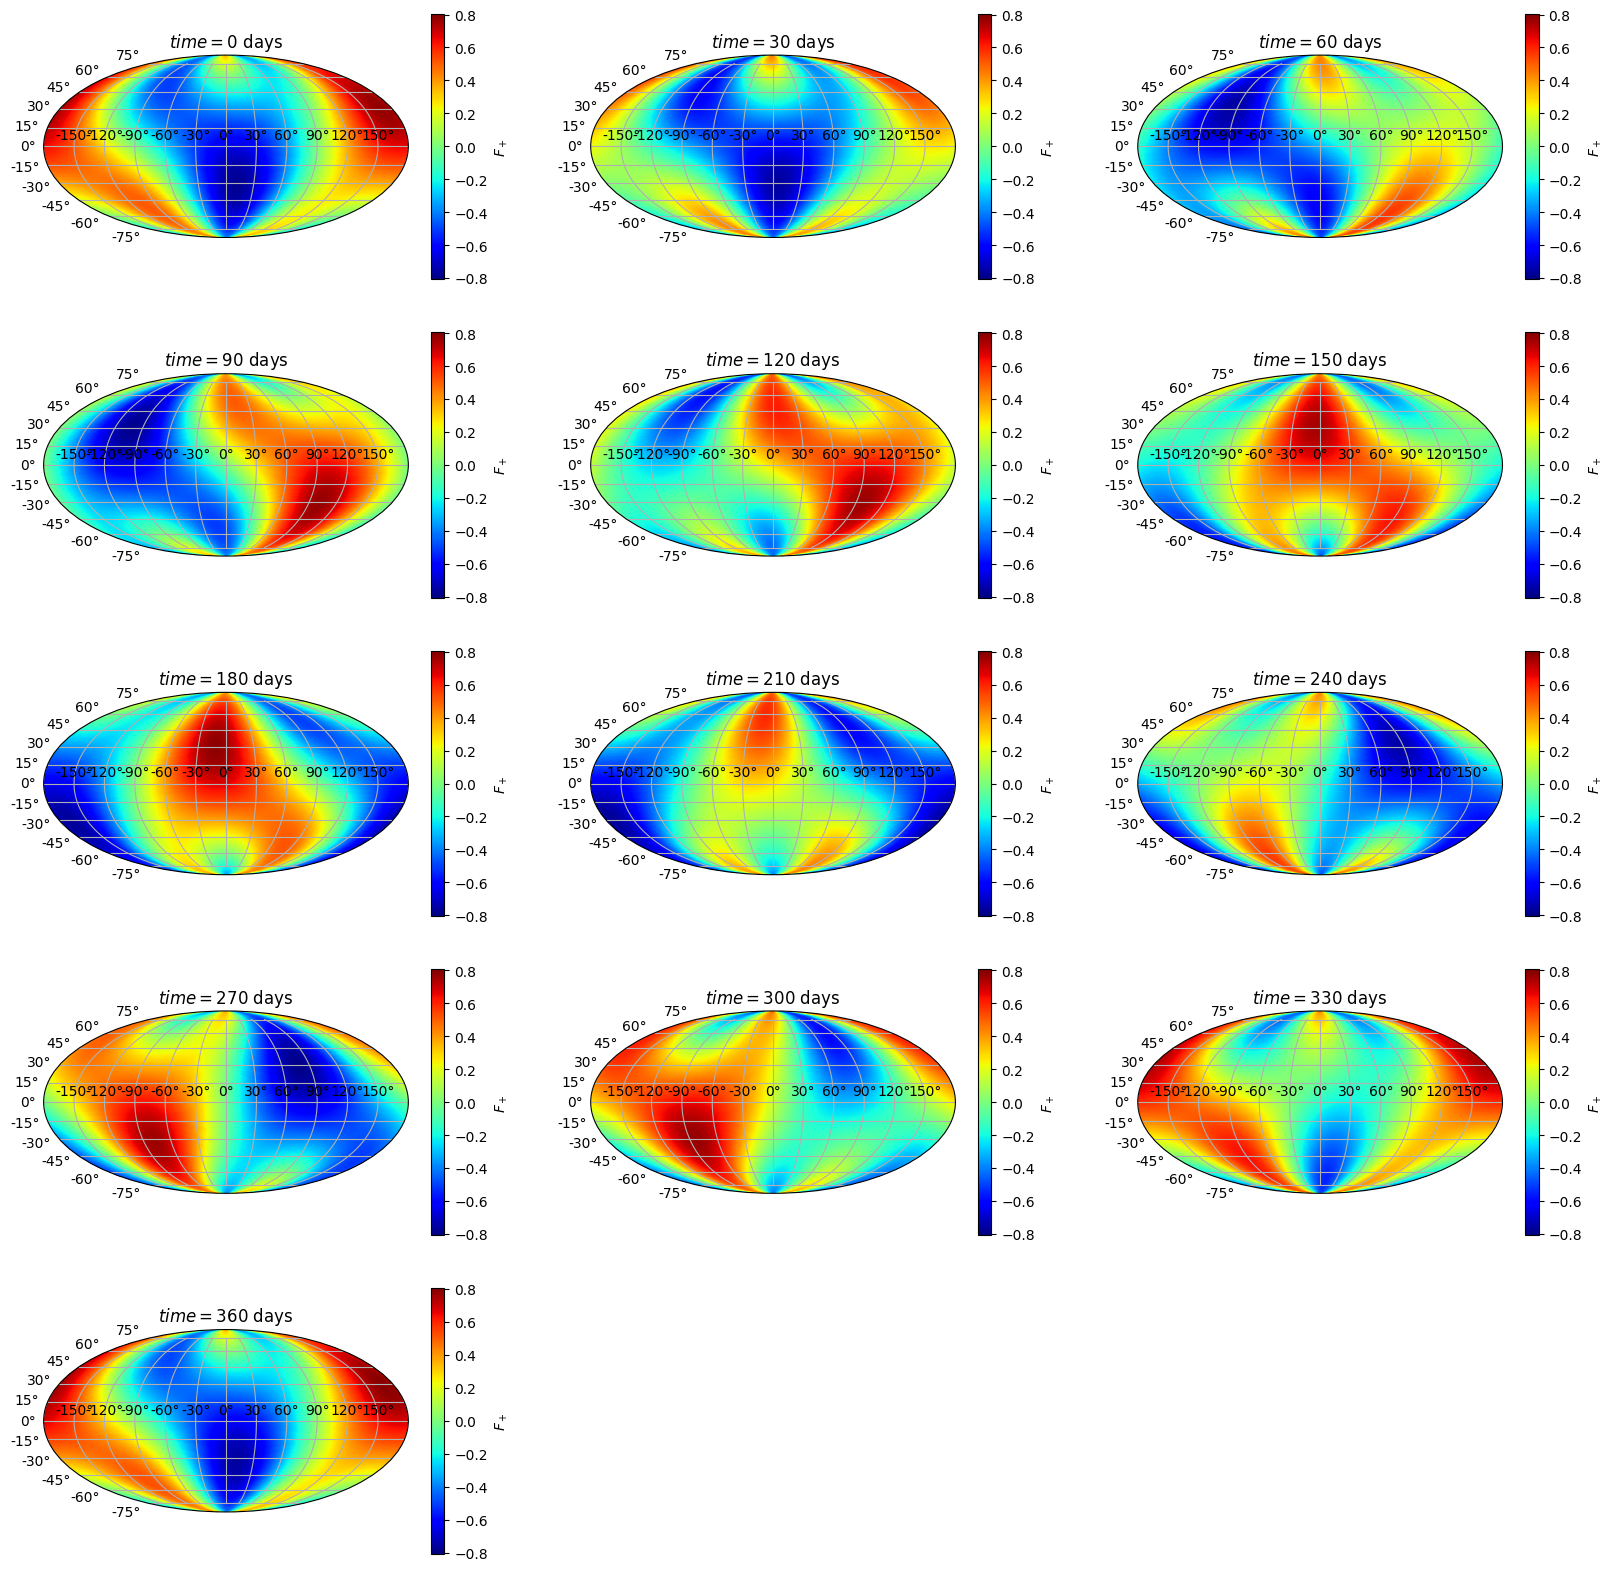

In [20]:
fig, axes = plt.subplots(5, 3, figsize = (20, 20), subplot_kw=dict(projection="mollweide"))

ax1, ax2, ax3 = axes[0, 0], axes[0, 1], axes[0, 2]
ax4, ax5, ax6 = axes[1, 0], axes[1, 1], axes[1, 2]
ax7, ax8, ax9 = axes[2, 0], axes[2, 1], axes[2, 2]
ax10, ax11, ax12 = axes[3, 0], axes[3, 1], axes[3, 2]
ax13 = axes[4, 0]

vmin, vmax = F_plus.min(), F_plus.max()

im1 = ax1.pcolormesh(Lamda, Beta, F_plus[0], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im1, label = r'$F_+$')
ax1.grid()
ax1.set(title = r'$time = 0$ days')

im2 = ax2.pcolormesh(Lamda, Beta, F_plus[30], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im2, label = r'$F_+$')
ax2.grid()
ax2.set(title = r'$time = 30$ days')

im3 = ax3.pcolormesh(Lamda, Beta, F_plus[60], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im3, label = r'$F_+$')
ax3.grid()
ax3.set(title = r'$time = 60$ days')

im4 = ax4.pcolormesh(Lamda, Beta, F_plus[90], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im4, label = r'$F_+$')
ax4.grid()
ax4.set(title = r'$time = 90$ days')

im5 = ax5.pcolormesh(Lamda, Beta, F_plus[120], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im5, label = r'$F_+$')
ax5.grid()
ax5.set(title = r'$time = 120$ days')

im6 = ax6.pcolormesh(Lamda, Beta, F_plus[150], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im6, label = r'$F_+$')
ax6.grid()
ax6.set(title = r'$time = 150$ days')

im7 = ax7.pcolormesh(Lamda, Beta, F_plus[180], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im7, label = r'$F_+$')
ax7.grid()
ax7.set(title = r'$time = 180$ days')

im8 = ax8.pcolormesh(Lamda, Beta, F_plus[210], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im8, label = r'$F_+$')
ax8.grid()
ax8.set(title = r'$time = 210$ days')

im9 = ax9.pcolormesh(Lamda, Beta, F_plus[240], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im9, label = r'$F_+$')
ax9.grid()
ax9.set(title = r'$time = 240$ days')

im10 = ax10.pcolormesh(Lamda, Beta, F_plus[270], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im10, label = r'$F_+$')
ax10.grid()
ax10.set(title = r'$time = 270$ days')

im11 = ax11.pcolormesh(Lamda, Beta, F_plus[300], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im11, label = r'$F_+$')
ax11.grid()
ax11.set(title = r'$time = 300$ days')

im12 = ax12.pcolormesh(Lamda, Beta, F_plus[330], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im12, label = r'$F_+$')
ax12.grid()
ax12.set(title = r'$time = 330$ days')

im13 = ax13.pcolormesh(Lamda, Beta, F_plus[360], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im13, label = r'$F_+$')
ax13.grid()
ax13.set(title = r'$time = 360$ days')

fig.delaxes(axes[4, 1])
fig.delaxes(axes[4, 2])

plt.savefig('Fplus.jpg', dpi = 200)
plt.show()

### $F_\times$

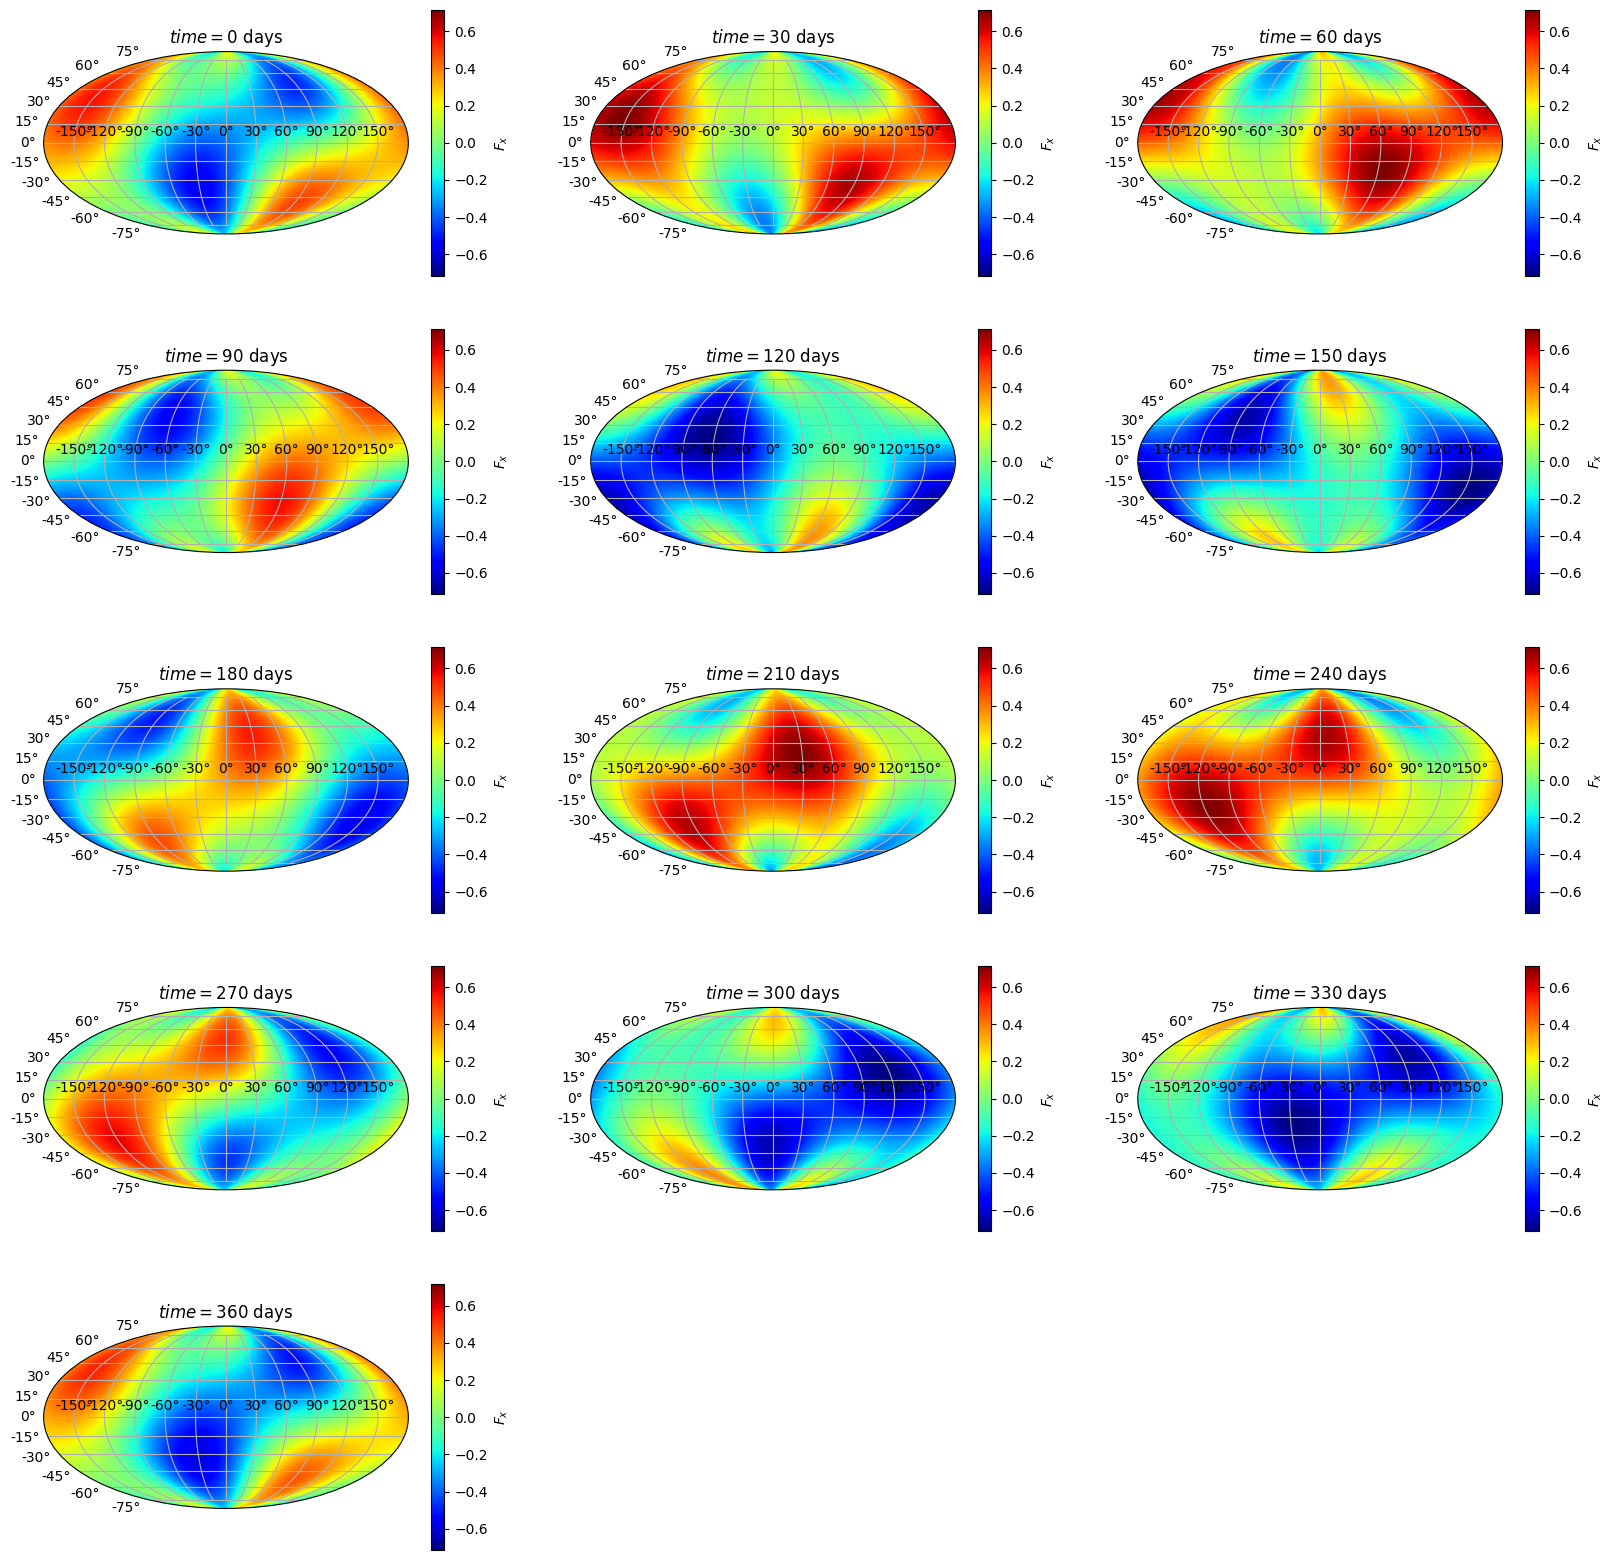

In [21]:
fig, axes = plt.subplots(5, 3, figsize = (20, 20), subplot_kw=dict(projection="mollweide"))

ax1, ax2, ax3 = axes[0, 0], axes[0, 1], axes[0, 2]
ax4, ax5, ax6 = axes[1, 0], axes[1, 1], axes[1, 2]
ax7, ax8, ax9 = axes[2, 0], axes[2, 1], axes[2, 2]
ax10, ax11, ax12 = axes[3, 0], axes[3, 1], axes[3, 2]
ax13 = axes[4, 0]

vmin, vmax = F_cross.min(), F_cross.max()

im1 = ax1.pcolormesh(Lamda, Beta, F_cross[0], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im1, label = r'$F_x$')
ax1.grid()
ax1.set(title = r'$time = 0$ days')

im2 = ax2.pcolormesh(Lamda, Beta, F_cross[30], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im2, label = r'$F_x$')
ax2.grid()
ax2.set(title = r'$time = 30$ days')

im3 = ax3.pcolormesh(Lamda, Beta, F_cross[60], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im3, label = r'$F_x$')
ax3.grid()
ax3.set(title = r'$time = 60$ days')

im4 = ax4.pcolormesh(Lamda, Beta, F_cross[90], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im4, label = r'$F_x$')
ax4.grid()
ax4.set(title = r'$time = 90$ days')

im5 = ax5.pcolormesh(Lamda, Beta, F_cross[120], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im5, label = r'$F_x$')
ax5.grid()
ax5.set(title = r'$time = 120$ days')

im6 = ax6.pcolormesh(Lamda, Beta, F_cross[150], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im6, label = r'$F_x$')
ax6.grid()
ax6.set(title = r'$time = 150$ days')

im7 = ax7.pcolormesh(Lamda, Beta, F_cross[180], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im7, label = r'$F_x$')
ax7.grid()
ax7.set(title = r'$time = 180$ days')

im8 = ax8.pcolormesh(Lamda, Beta, F_cross[210], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im8, label = r'$F_x$')
ax8.grid()
ax8.set(title = r'$time = 210$ days')

im9 = ax9.pcolormesh(Lamda, Beta, F_cross[240], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im9, label = r'$F_x$')
ax9.grid()
ax9.set(title = r'$time = 240$ days')

im10 = ax10.pcolormesh(Lamda, Beta, F_cross[270], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im10, label = r'$F_x$')
ax10.grid()
ax10.set(title = r'$time = 270$ days')

im11 = ax11.pcolormesh(Lamda, Beta, F_cross[300], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im11, label = r'$F_x$')
ax11.grid()
ax11.set(title = r'$time = 300$ days')

im12 = ax12.pcolormesh(Lamda, Beta, F_cross[330], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im12, label = r'$F_x$')
ax12.grid()
ax12.set(title = r'$time = 330$ days')

im13 = ax13.pcolormesh(Lamda, Beta, F_cross[360], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im13, label = r'$F_x$')
ax13.grid()
ax13.set(title = r'$time = 360$ days')

fig.delaxes(axes[4, 1])
fig.delaxes(axes[4, 2])

plt.savefig('Fcross.jpg', dpi = 200)
plt.show()

### $\sqrt{F_+^2 + F_\times^2}$

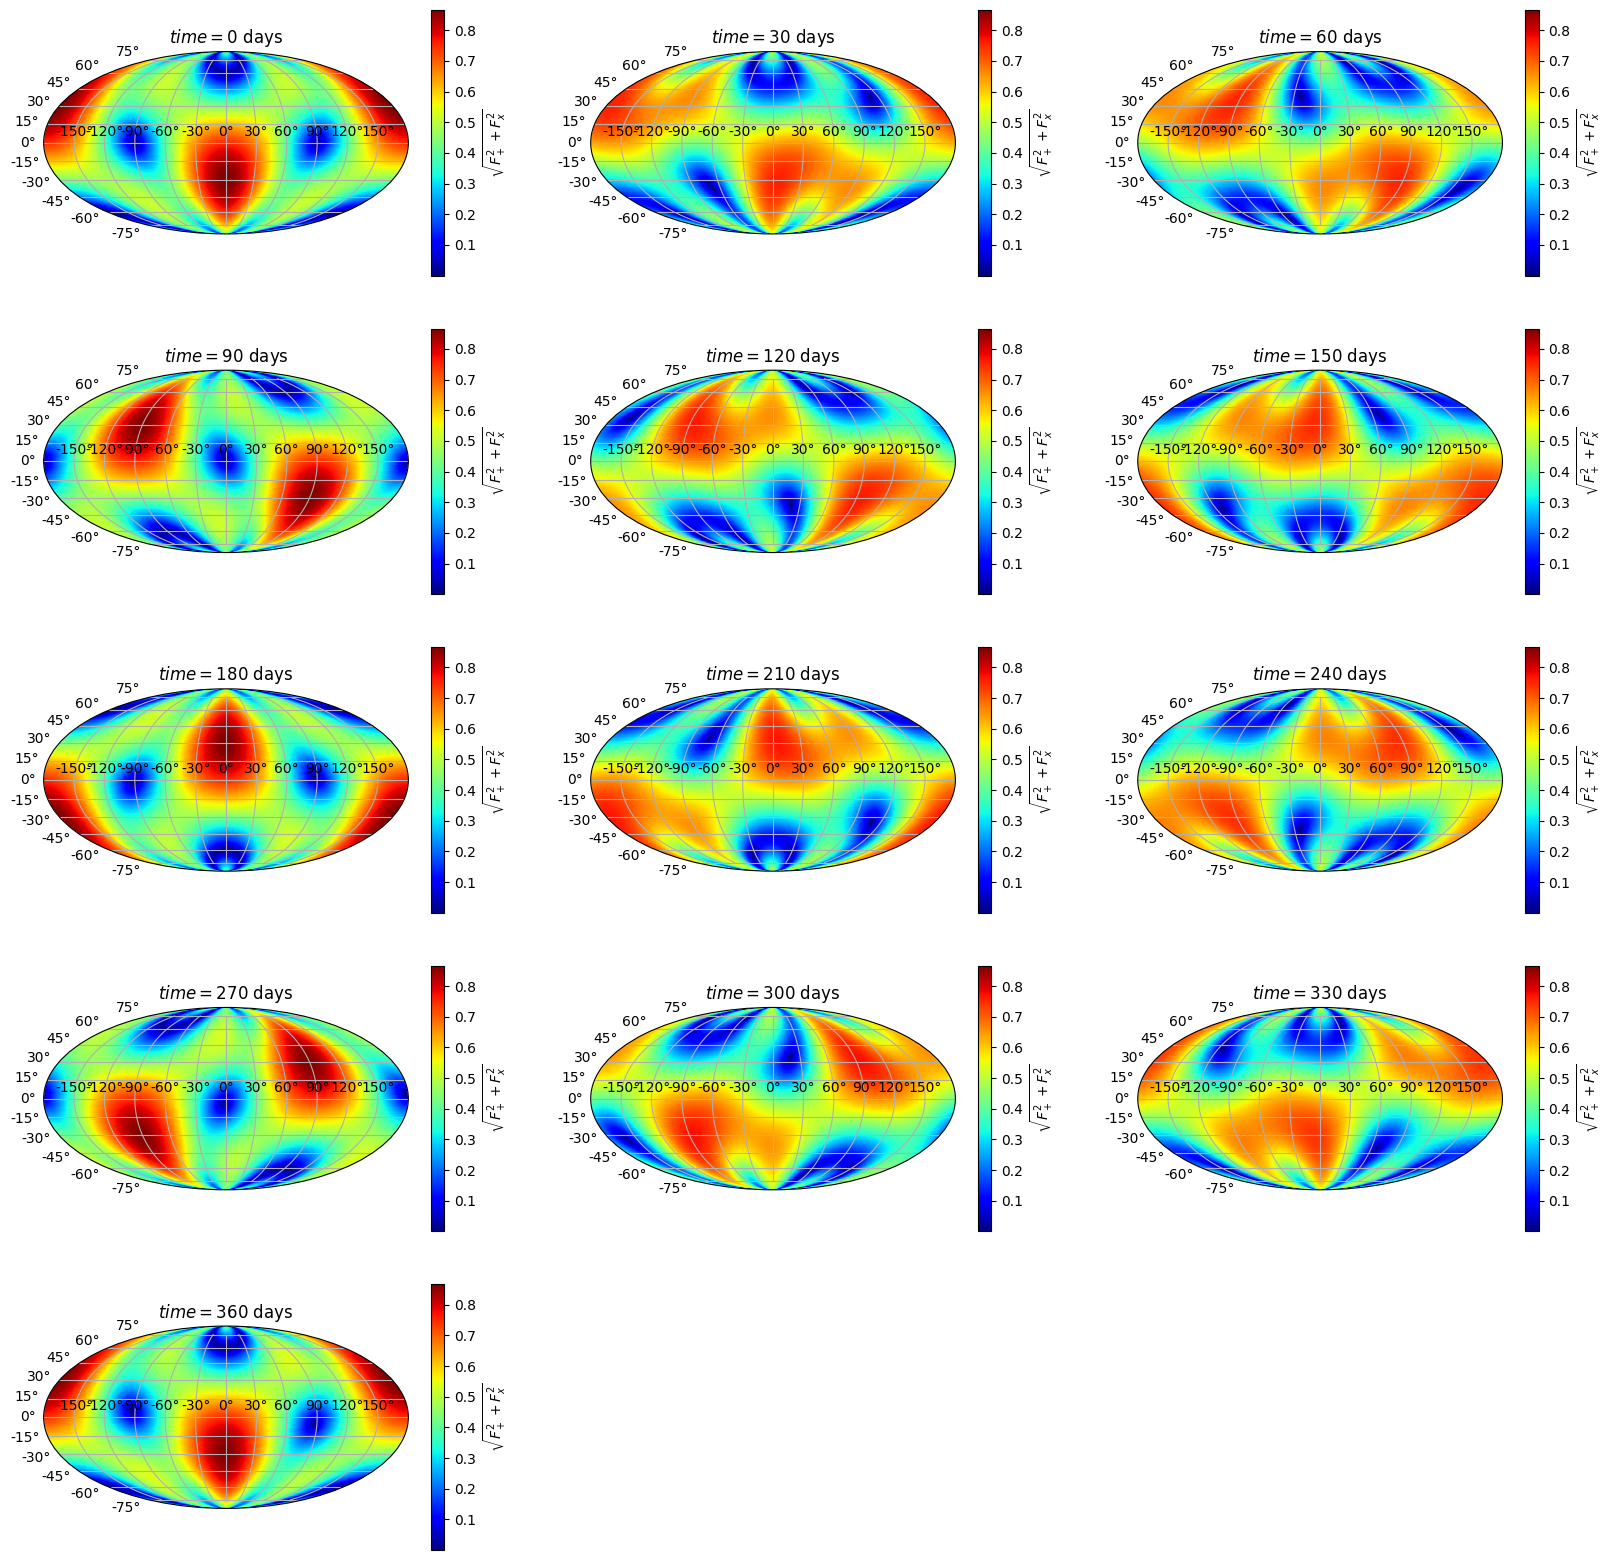

In [22]:
fig, axes = plt.subplots(5, 3, figsize = (20, 20), subplot_kw=dict(projection="mollweide"))

ax1, ax2, ax3 = axes[0, 0], axes[0, 1], axes[0, 2]
ax4, ax5, ax6 = axes[1, 0], axes[1, 1], axes[1, 2]
ax7, ax8, ax9 = axes[2, 0], axes[2, 1], axes[2, 2]
ax10, ax11, ax12 = axes[3, 0], axes[3, 1], axes[3, 2]
ax13 = axes[4, 0]

vmin, vmax = F_mag.min(), F_mag.max()

im1 = ax1.pcolormesh(Lamda, Beta, F_mag[0], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im1, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax1.grid()
ax1.set(title = r'$time = 0$ days')

im2 = ax2.pcolormesh(Lamda, Beta, F_mag[30], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im2, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax2.grid()
ax2.set(title = r'$time = 30$ days')

im3 = ax3.pcolormesh(Lamda, Beta, F_mag[60], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im3, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax3.grid()
ax3.set(title = r'$time = 60$ days')

im4 = ax4.pcolormesh(Lamda, Beta, F_mag[90], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im4, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax4.grid()
ax4.set(title = r'$time = 90$ days')

im5 = ax5.pcolormesh(Lamda, Beta, F_mag[120], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im5, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax5.grid()
ax5.set(title = r'$time = 120$ days')

im6 = ax6.pcolormesh(Lamda, Beta, F_mag[150], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im6, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax6.grid()
ax6.set(title = r'$time = 150$ days')

im7 = ax7.pcolormesh(Lamda, Beta, F_mag[180], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im7, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax7.grid()
ax7.set(title = r'$time = 180$ days')

im8 = ax8.pcolormesh(Lamda, Beta, F_mag[210], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im8, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax8.grid()
ax8.set(title = r'$time = 210$ days')

im9 = ax9.pcolormesh(Lamda, Beta, F_mag[240], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im9, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax9.grid()
ax9.set(title = r'$time = 240$ days')

im10 = ax10.pcolormesh(Lamda, Beta, F_mag[270], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im10, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax10.grid()
ax10.set(title = r'$time = 270$ days')

im11 = ax11.pcolormesh(Lamda, Beta, F_mag[300], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im11, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax11.grid()
ax11.set(title = r'$time = 300$ days')

im12 = ax12.pcolormesh(Lamda, Beta, F_mag[330], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im12, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax12.grid()
ax12.set(title = r'$time = 330$ days')

im13 = ax13.pcolormesh(Lamda, Beta, F_mag[360], cmap=plt.cm.jet, vmin = vmin, vmax = vmax)
fig.colorbar(im13, label = r'$\sqrt{F_+^2 + F_x^2}$')
ax13.grid()
ax13.set(title = r'$time = 360$ days')

fig.delaxes(axes[4, 1])
fig.delaxes(axes[4, 2])

plt.savefig('Fmag.jpg', dpi = 200)
plt.show()